In [1]:
import pandas as pd
from pickle import NONE
from re import T
import re
import pandas as pd
import json
import glob
import os 
import argparse
import logging
import numpy as np
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
normal_method=5
filename= str(f'soft{normal_method}_results_summary.pkl')

In [3]:
def one_dataset_modelabb(dataset, model_abb, normal_method):
        file_path = f'./posthoc_results/{dataset}/{model_abb}/ZEROOUT-faithfulness-scores-normal_{normal_method}.json'
        zeroout = pd.read_json(file_path, orient ='index')
        zeroout.rename(columns = {'AOPC - sufficiency':'Soft_Sufficiency', 'AOPC - comprehensiveness':'Soft_Comprehensiveness'}, inplace = True)

        suff = []
        comp = []
        suff_std = []
        comp_std = []
        fea_list = ['random', 'attention', "scaled attention", "gradients", "ig", "deeplift"] #"gradientshap", 

        for feat in fea_list:
                suff.append(zeroout.Soft_Sufficiency[str(feat)].get('mean'))
                comp.append(zeroout.Soft_Comprehensiveness[str(feat)].get('mean'))
                
                suff_std.append(zeroout.Soft_Sufficiency[str(feat)].get('std'))
                comp_std.append(zeroout.Soft_Comprehensiveness[str(feat)].get('std'))

        final_df = pd.DataFrame(list(zip(fea_list, suff, suff_std, comp, comp_std)),
                columns =['Feature','AOPC NormSuff', 'std', 'AOPC NormComp', 'std'])
        final_df['Dataset'] = str(dataset)

        df = final_df.T
        df = df.rename(columns=df.iloc[0]).drop(df.index[0])
        df = df[:-1] # drop the las dataset name row

        df['attention'] = df['attention']/df['random']
        df['scaled attention'] = df['scaled attention']/df['random']
        df['gradients'] = df['gradients']/df['random']
        df['integrated gradients'] = df['ig']/df['random']
        df['deeplift'] = df['deeplift']/df['random']

        pred_faith_dict = {}
        pred_faith_dict['Attention_Soft_Suff'] = df['attention']['AOPC NormSuff']
        pred_faith_dict['Scaled_Attention_Soft_Suff'] = df['scaled attention']['AOPC NormSuff']
        pred_faith_dict['Gradients_Soft_Suff'] = df['gradients']['AOPC NormSuff']
        pred_faith_dict['Integrated_Gradients_Soft_Suff'] = df['integrated gradients']['AOPC NormSuff']
        pred_faith_dict['Deeplift_Soft_Suff'] = df['deeplift']['AOPC NormSuff']
        pred_faith_dict['Attention_Soft_Comp'] = df['attention']['AOPC NormComp']
        pred_faith_dict['Scaled_Attention_Soft_Comp'] = df['scaled attention']['AOPC NormComp']
        pred_faith_dict['Gradients_Soft_Comp'] = df['gradients']['AOPC NormComp']
        pred_faith_dict['Integrated_Gradients_Soft_Comp'] = df['integrated gradients']['AOPC NormComp']
        pred_faith_dict['Deeplift_Soft_Comp'] = df['deeplift']['AOPC NormComp']

        model_pred_faith_dict = {}
        model_pred_faith_dict[model_abb] = pred_faith_dict

        return model_pred_faith_dict


In [4]:
def add_one_data_model_to_dict(filename, dataset, model_abb, model_pred_faith_dict):
    if not os.path.isfile(filename):
        with open(filename,"wb") as file:
            result = {str(dataset):model_pred_faith_dict}
            pickle.dump(result, file)


    else:
        with open(filename, 'rb') as f:
            loaded_dict_soft = pickle.load(f)

            
            if dataset in loaded_dict_soft.keys(): 
                print(f' have the data {dataset} in dict already !!!')
                model_list = loaded_dict_soft[dataset].keys()
                print(' ONLY update model --->', model_abb)
                loaded_dict_soft[dataset].update(model_pred_faith_dict)
            else: 
                print(f' add {dataset} and {model_abb} to the dict')
                loaded_dict_soft[dataset] = model_pred_faith_dict

            for dataset in loaded_dict_soft.keys():
                print(' ')
                print(' ')
                print('------')
                
                print(dataset)
                print('------')
                for model in loaded_dict_soft[dataset].keys():
                    print(model)
                    #print(loaded_dict[data][model])


            with open(filename, 'wb') as f:
                pickle.dump(loaded_dict_soft, f)

In [5]:
multilingual_model_list = ['mbert', 'xlm_roberta']

english_model_list = ['bert', 'roberta']
spanish_model_list = ['spanish_bert', 'spanish_roberta']
french_model_list = ['french_bert', 'french_roberta']
chinese_model_list = ['chinese_bert', 'chinese_roberta']
hindi_model_list = ['hindi_bert', 'hindi_roberta']



In [6]:
english_data_list = ['sst', 'agnews', 'multirc']
hindi_data_list = ['hindi_xnli', 'hindi_bbc_nli', 'hindi_bbc_topic']
chinese_data_list = ['ChnSentiCorp', 'csl', 'ant']
spanish_data_list = ['spanish_csl', 'spanish_paws', 'spanish_xnli']
french_data_list = ['french_csl', 'french_paws', 'french_xnli']

def add_one_lang(model_list, data_list):
    for data in data_list:
        for model in model_list:
            temp_dict = one_dataset_modelabb(data, model, normal_method)
            add_one_data_model_to_dict(filename, data,model, temp_dict)


add_one_lang(english_model_list+multilingual_model_list, english_data_list)


 have the data sst in dict already !!!
 ONLY update model ---> bert
 
 
------
french_csl
------
french_roberta
french_bert
mbert
xlm_roberta
 
 
------
hindi_bbc_topic
------
hindi_roberta
hindi_bert
mbert
xlm_roberta
 
 
------
hindi_bbc_nli
------
hindi_roberta
hindi_bert
mbert
xlm_roberta
 
 
------
sst
------
bert
roberta
mbert
xlm_roberta
 
 
------
agnews
------
bert
roberta
mbert
xlm_roberta
 
 
------
multirc
------
bert
roberta
mbert
xlm_roberta
 
 
------
ChnSentiCorp
------
chinese_bert
chinese_roberta
mbert
xlm_roberta
 
 
------
csl
------
chinese_bert
chinese_roberta
mbert
xlm_roberta
 
 
------
ant
------
chinese_bert
chinese_roberta
mbert
xlm_roberta
 
 
------
hindi_xnli
------
hindi_bert
hindi_roberta
mbert
xlm_roberta
 have the data sst in dict already !!!
 ONLY update model ---> roberta
 
 
------
french_csl
------
french_roberta
french_bert
mbert
xlm_roberta
 
 
------
hindi_bbc_topic
------
hindi_roberta
hindi_bert
mbert
xlm_roberta
 
 
------
hindi_bbc_nli
-----

FileNotFoundError: File ./posthoc_results/multirc/roberta/ZEROOUT-faithfulness-scores-normal_5.json does not exist

In [ ]:
with open(filename, 'rb') as f:
    loaded_dict = pickle.load(f)

## change xlm-roberta to xlm_roberta
keys_list = list(loaded_dict.keys())
key_tobe_updated = []
subkey_tobe_updated = []
for key in keys_list:
    print(key)
    for sub_key in loaded_dict[key]:
        if sub_key == 'xlm-roberta':
            key_tobe_updated.append(key)
            #subkey_tobe_updated.append(sub_key)


for key in key_tobe_updated:
    loaded_dict[key]['xlm_roberta'] = loaded_dict[key]['xlm-roberta']
for key in key_tobe_updated:
    del loaded_dict[key]['xlm-roberta']



french_csl
hindi_bbc_topic
hindi_bbc_nli
sst
agnews
multirc
ChnSentiCorp
csl
ant
hindi_xnli


In [ ]:
# {'sst': {'mbert': {'Attention_Suff':
def remove_a_model_dict(dict, model_to_delete):
    for a_dataset in dict.keys():
        print(a_dataset)
        for a_model in dict[a_dataset].keys():
            if a_model == model_to_delete:
                print(' FOND ONE')
                dict[a_dataset].pop(model_to_delete, None)
    return dict



def remove_a_dataset_dict(dict, dataset_to_delete):
    print(len(dict.keys()))
    dataset_in_the_dict = list(dict.keys())
    for a_dataset in dataset_in_the_dict:
        if a_dataset == dataset_to_delete:
            print(f' FOND ONE: {a_dataset}')
            dict.pop(a_dataset, None)
    with open('results_summary.pkl', 'wb') as f:
        pickle.dump(loaded_dict, f)
    print(len(dict.keys()))


def remove_a_dataset_model_dict(dict, dataset_to_delete, model_to_delete):
    dict[dataset_to_delete].pop(model_to_delete, None)
    with open('results_summary.pkl', 'wb') as f:
        pickle.dump(loaded_dict, f)


In [ ]:
data_df_list = []

for data in loaded_dict.keys():
     df_list = []
     # print(' ')
     # print(data)
     for model in loaded_dict[data].keys():
          df = pd.DataFrame.from_dict(loaded_dict[data][model], orient='index', columns=[model])
          df = df.transpose()
          df['model'] = model
          df_list.append(df)
          
     if len(df_list) == 0: print('THIS DATA NO MODEL', data)
     result = pd.concat(df_list)
     result['dataset'] = data
     # new_row = pd.Series(pd.Series(), index=result.columns)
     # result = result.append(new_row)

     data_df_list.append(result)


result = pd.concat(data_df_list)
result.insert(0, 'model', result.pop('model'))
result = result.set_index('dataset',drop=True).round(3)

result.to_csv(f'summary_{normal_method}.csv')

french_csl
french_csl
french_csl
french_csl
hindi_bbc_topic
hindi_bbc_topic
hindi_bbc_topic
hindi_bbc_topic
hindi_bbc_nli
hindi_bbc_nli
hindi_bbc_nli
hindi_bbc_nli
sst
sst
sst
sst
agnews
agnews
agnews
agnews
multirc
multirc
multirc
multirc
ChnSentiCorp
ChnSentiCorp
ChnSentiCorp
ChnSentiCorp
csl
csl
csl
csl
ant
ant
ant
ant
hindi_xnli
hindi_xnli
hindi_xnli
hindi_xnli


In [ ]:
Multi_Mono_dict = {
                   "bert": "Monolingual", "roberta": "Monolingual", 
                   "hindi_bert": "Monolingual", "hindi_roberta": "Monolingual", 
                   "chinese_roberta": "Monolingual", "zhbert": "Monolingual" , "chinese_bert": "Monolingual", 
                   "spanish_roberta": "Monolingual", "BETO": "Monolingual",  
                   "french_bert": "Monolingual","french_roberta": "Monolingual",
                   
                   "mbert": "Multilingual", "xlm_roberta": "Multilingual", "xlm_roberta_large": "Multilingual", 
                   }
# assert len(Multi_Mono_dict.keys()) == result['model'].nunique()

In [ ]:
data_rep_dict = {'sst': 'SST', 'agnews': 'AG', 'multirc': 'MultiRC',
                 'ant': 'ANT', 'csl':'KR', 'ChnSentiCorp':'ChnSentiCorp',
                 'spanish_csl': 'CSL', 'spanish_paws': 'PAWS', 'spanish_xnli':'XNLI',
                 'french_csl': 'CSL', 'french_paws': 'PAWS', 'french_xnli':'XNLI',
                 'hindi_xnli': 'XNLI', 'hindi_bbc_nli':'NLI', 'hindi_bbc_topic':'Topic'
                 }

english_df = result[result.index.isin(english_data_list)]#.rename(index=data_rep_dict)
chinese_df = result[result.index.isin(chinese_data_list)]#.rename(index=data_rep_dict)
spanish_df = result[result.index.isin(spanish_data_list)]#.rename(index=data_rep_dict)
french_df = result[result.index.isin(french_data_list)]#.rename(index=data_rep_dict)
hindi_df = result[result.index.isin(hindi_data_list)]#.rename(index=data_rep_dict)

In [ ]:
FA_rep_dict={'Attention': '$\\alpha$', 'Scaled_Attention': '$\\alpha\\nabla\\alpha$', 'Gradients': '$x\\nabla x$', 'Integrated_Gradients': 'IG', 'Deeplift': 'DL'}


In [ ]:
def get_one_subplot(english_df, dataset_name, suff_or_comp):

    one_dataset_df = english_df[english_df.index == str(dataset_name)][['model', 'Attention_Soft_Suff', 'Scaled_Attention_Soft_Suff', 'Gradients_Soft_Suff', 'Integrated_Gradients_Soft_Suff', 'Deeplift_Soft_Suff',
                                                'Attention_Soft_Comp', 'Scaled_Attention_Soft_Comp', 'Gradients_Soft_Comp', 'Integrated_Gradients_Soft_Comp', 'Deeplift_Soft_Comp' ]]


    if suff_or_comp == 'Suff': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Comp)')
    elif suff_or_comp == 'Comp': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Suff)')

    
    else: print('sth wrong about defining Suff or Comp for suff_or_com')

    one_dataset_df['Multi_Mono'] = one_dataset_df['model'].apply(lambda x: Multi_Mono_dict[x])

    df_strip = one_dataset_df.melt(id_vars=['model', 'Multi_Mono'], var_name='FA', value_name=suff_or_comp)
    df_strip['FA'] = df_strip['FA'].str.replace(f'_Soft_{suff_or_comp}', '')
    df_strip['FA'] = df_strip['FA'].apply(lambda x: FA_rep_dict[x])
    
    

    df_strip = df_strip.rename(columns={'FA': f'{dataset_name}_FA', suff_or_comp: f'{dataset_name}_{suff_or_comp}', 'model': 'Model'})
    df_strip.loc[df_strip['Model'].str.contains('mbert'), 'Model'] = 'BERT'
    df_strip.loc[df_strip['Model'].str.contains('xlm_roberta'), 'Model'] = 'RoBERTa'

    df_strip.loc[df_strip['Model'].str.contains('roberta'), 'Model'] = 'RoBERTa'
    df_strip.loc[df_strip['Model'].str.contains('bert'), 'Model'] = 'BERT'
    df_strip.loc[df_strip['Model'].str.contains('BETO'), 'Model'] = 'BERT'
    

    
    
    return df_strip

In [ ]:
def plot_one_lang(english_df, lang_name, english_data_list, suff_or_comp):
    
    
    df_list = []
    for dataset_name in english_data_list:
        
        temp_df = get_one_subplot(english_df, dataset_name, suff_or_comp)
        df_list.append(temp_df)

    df = pd.merge(df_list[0], df_list[1], on=["Model", "Multi_Mono"])
    df = pd.merge(df, df_list[2], on=["Model", "Multi_Mono"])
    
        
    hline_color = 'grey'
    hline_linestyle ='--'

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None,figsize=(7,3))

    markers = {"Multilingual": "s", "Monolingual": "X"} 
    sns.scatterplot(data=df, x=f'{english_data_list[0]}_FA', y=f'{english_data_list[0]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax1, markers=markers)
    ax1.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax1.title.set_text(data_rep_dict.get(english_data_list[0]))
    ax1.set_ylabel('')
    ax1.set_xlabel('') # r'$\alpha$'

    sns.scatterplot(data=df, x=f'{english_data_list[1]}_FA', y=f'{english_data_list[1]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax2, markers=markers)
    ax2.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax2.title.set_text(data_rep_dict.get(english_data_list[1]))
    ax2.set_ylabel('')
    ax2.set_xlabel('')

    sns.scatterplot(data=df, x=f'{english_data_list[2]}_FA', y=f'{english_data_list[2]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax3, markers=markers)
    ax3.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax3.title.set_text(data_rep_dict.get(english_data_list[2]))
    ax3.set_ylabel('')
    ax3.set_xlabel('')

    # # set common x and y labels
    fig.text(0.5, -0.01, 'Feature Attributes', ha='center', fontsize = 13)
    fig.text(0.5, 1.01, lang_name, va='center', fontsize = 13) # rotation='vertical', 

    if suff_or_comp == 'Suff': 
        fig.text(-0.01, 0.5, 'Sufficiency', rotation='vertical', va='center', fontsize = 13) # rotation='vertical', 
    elif suff_or_comp == 'Comp': 
        fig.text(-0.01, 0.5, 'Comprehensiveness', rotation='vertical', va='center', fontsize = 13)

    # create a single legend for both subplots and adjust its position
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles[:3], labels[:3], ncol=1, loc='lower right', bbox_to_anchor=(1.19, 0.4)) #
    fig.legend(handles[3:], labels[3:], ncol=1, loc='lower right', bbox_to_anchor=(1.19, 0.1)) #

    try: ax1.get_legend().remove()
    except: pass
    try: ax2.get_legend().remove()
    except: pass
    try: ax3.get_legend().remove()
    except: pass

    for ax_i in [ax1, ax2, ax3]:
        ax_i.tick_params(axis='x') # , rotation=22

    fig.tight_layout() 
    plt.savefig(f"./scatterplot/{lang_name}_{suff_or_comp}_soft.png", format="png", bbox_inches="tight")
    plt.show()


In [ ]:
english_df

,model,Attention_Soft_Suff,Scaled_Attention_Soft_Suff,Gradients_Soft_Suff,Integrated_Gradients_Soft_Suff,Deeplift_Soft_Suff,Attention_Soft_Comp,Scaled_Attention_Soft_Comp,Gradients_Soft_Comp,Integrated_Gradients_Soft_Comp,Deeplift_Soft_Comp
dataset,,,,,,,,,,,
sst,bert,0.572,0.423,0.430,0.375,0.651,0.796,0.752,0.731,0.678,1.287
sst,roberta,0.539,0.512,0.612,0.584,0.568,0.194,0.173,0.277,0.312,0.253
sst,mbert,0.901,0.868,0.789,0.781,0.435,0.362,0.383,0.359,0.312,1.130
sst,xlm_roberta,0.347,0.349,0.374,0.350,0.408,0.210,0.210,0.371,0.301,0.330
agnews,bert,0.460,0.260,0.561,0.452,0.429,1.723,1.623,1.905,1.738,1.738
agnews,roberta,0.263,0.260,0.509,0.547,0.882,0.189,0.170,0.301,0.439,0.594
agnews,mbert,0.200,0.164,0.341,0.502,0.488,0.454,0.448,0.497,0.495,0.937
agnews,xlm_roberta,0.095,0.080,0.231,0.299,0.212,0.621,0.509,0.786,0.793,0.668
multirc,bert,0.641,0.568,0.669,0.645,0.636,0.882,0.879,0.803,0.882,0.879


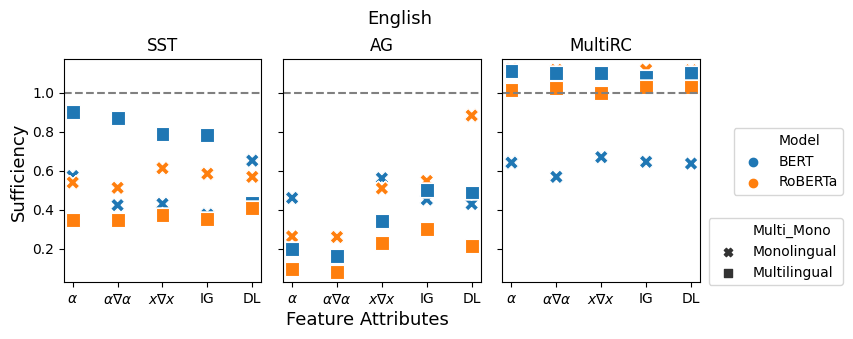

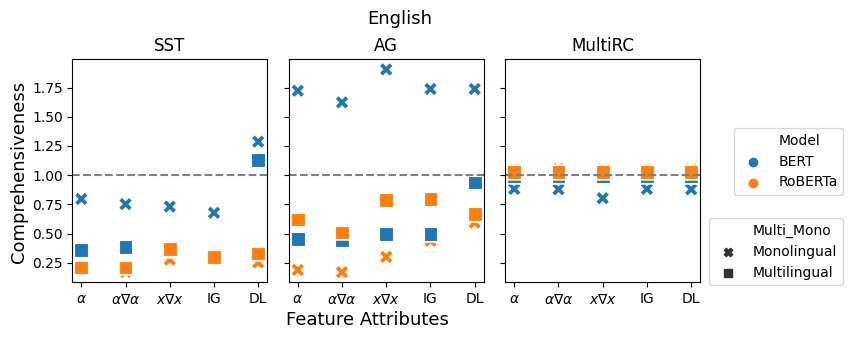

In [ ]:
# print(english_df[['model','F1', 'Accuracy']])
#english_df_selected = english_df[~english_df['model'].str.contains('large', na=False)]#.reset_index()
plot_one_lang(english_df, 'English', english_data_list, 'Suff')
plot_one_lang(english_df, 'English', english_data_list, 'Comp')

In [ ]:
#print(chinese_df[['model','F1', 'Accuracy']])
chinese_df_selected = chinese_df[~chinese_df['model'].str.contains('large', na=False)]#.reset_index()
print(chinese_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(chinese_df_selected, 'Chinese', chinese_data_list, 'Suff')
plot_one_lang(chinese_df_selected, 'Chinese', chinese_data_list, 'Comp')

KeyError: "['F1', 'Accuracy'] not in index"

              model  F1  Accuracy
dataset                          
spanish_xnli  mbert NaN       NaN
spanish_paws  mbert NaN       NaN
spanish_csl   mbert NaN       NaN


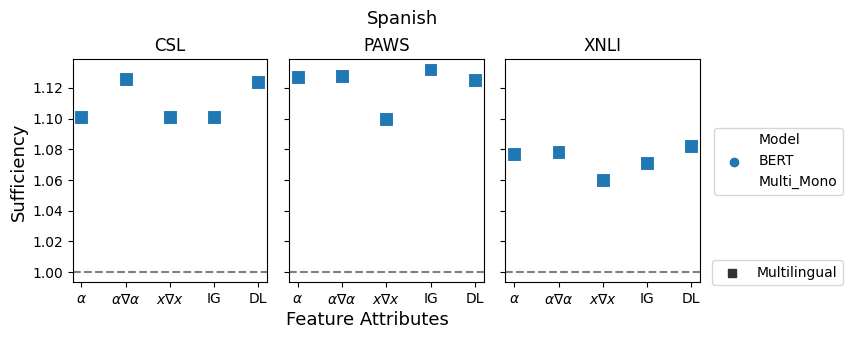

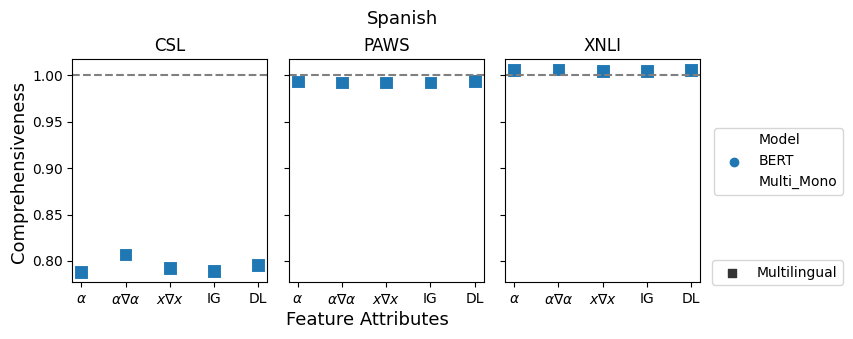

In [ ]:
# print(spanish_df[['model','F1', 'Accuracy']])
spanish_df_selected = spanish_df[~spanish_df['model'].str.contains('large', na=False)]#.reset_index()
print(spanish_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(spanish_df_selected, 'Spanish', spanish_data_list, 'Suff')
plot_one_lang(spanish_df_selected, 'Spanish', spanish_data_list, 'Comp')

                     model  F1  Accuracy
dataset                                 
french_csl  french_roberta NaN       NaN
french_csl     french_bert NaN       NaN
french_csl           mbert NaN       NaN
french_csl     xlm_roberta NaN       NaN


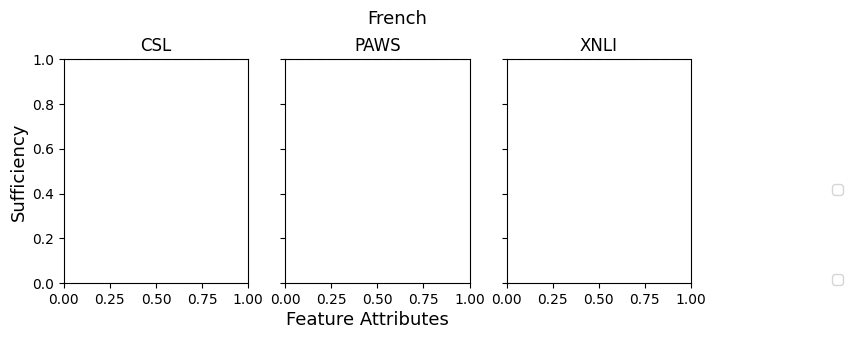

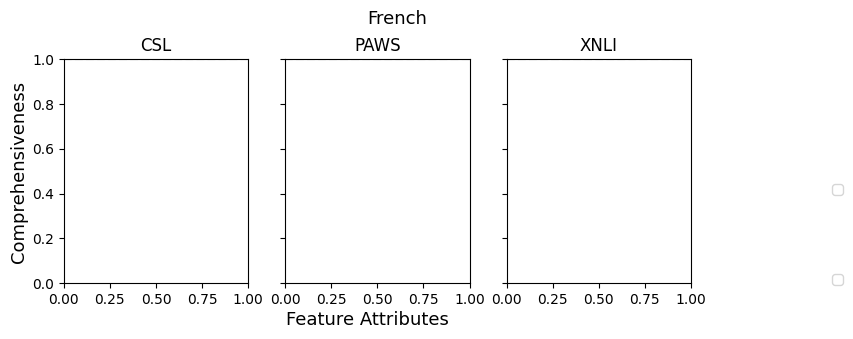

In [ ]:
french_df_selected = french_df[~french_df['model'].str.contains('large', na=False)]#.reset_index()
print(french_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(french_df_selected, 'French', french_data_list, 'Suff')
plot_one_lang(french_df_selected, 'French', french_data_list, 'Comp')

                         model     F1  Accuracy
dataset                                        
hindi_bbc_topic  hindi_roberta  0.589       NaN
hindi_bbc_nli    hindi_roberta    NaN     0.569


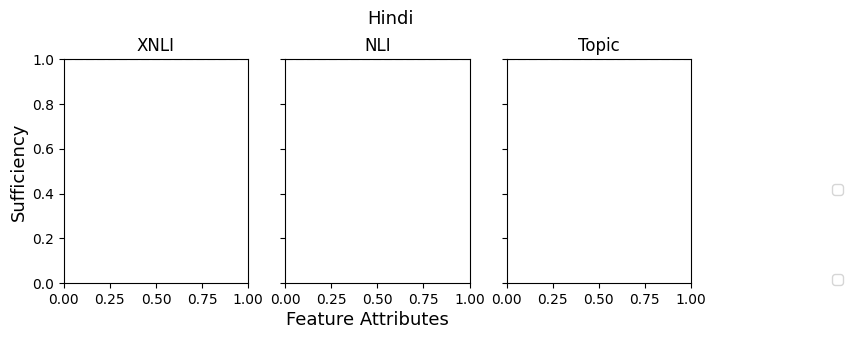

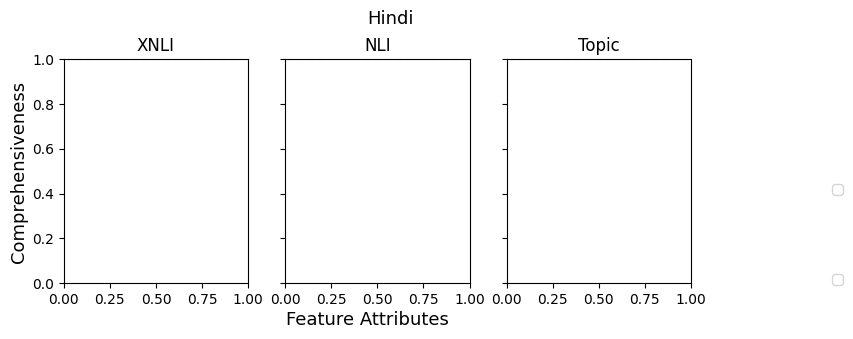

In [ ]:
hindi_df_selected = hindi_df[~hindi_df['model'].str.contains('large', na=False)]#.reset_index()
print(hindi_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(hindi_df_selected, 'Hindi', hindi_data_list, 'Suff')
plot_one_lang(hindi_df_selected, 'Hindi', hindi_data_list, 'Comp')

In [ ]:
# def get_one_subplot(english_df, dataset_name, suff_or_comp):

#     one_dataset_df = english_df[english_df.index == str(dataset_name)][['model', 'Attention_Suff', 'Scaled_Attention_Suff', 'Gradients_Suff', 'Integrated_Gradients_Suff', 'Deeplift_Suff',
#                                                 'Attention_Comp', 'Scaled_Attention_Comp', 'Gradients_Comp', 'Integrated_Gradients_Comp', 'Deeplift_Comp' ]]


#     if suff_or_comp == 'Suff': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Comp)')
#     elif suff_or_comp == 'Comp': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Suff)')
#     else: print('sth wrong about defining Suff or Comp for suff_or_com')

#     one_dataset_df['Multi_Mono'] = one_dataset_df['model'].apply(lambda x: Multi_Mono_dict[x])
    

#     df_strip = one_dataset_df.melt(id_vars=['model', 'Multi_Mono'], var_name='FA', value_name=suff_or_comp)
#     df_strip['FA'] = df_strip['FA'].str.replace(f'_{suff_or_comp}', '')

#     df_strip = df_strip.rename(columns={'FA': f'{dataset_name}_FA', suff_or_comp: f'{dataset_name}_{suff_or_comp}', 'model': 'Model'})
#     df_strip.loc[df_strip['Model'].str.contains('mbert'), 'Model'] = 'mBERT'
#     df_strip.loc[df_strip['Model'].str.contains('roberta_large'), 'Model'] = 'RoBERTa large'
#     df_strip.loc[df_strip['Model'].str.contains('xlm_roberta'), 'Model'] = 'RoBERTa'

#     df_strip.loc[df_strip['Model'].str.contains('hindi_roberta'), 'Model'] = 'Hindi RoBERTa'
#     df_strip.loc[df_strip['Model'].str.contains('roberta'), 'Model'] = 'English RoBERTa'
    
#     df_strip.loc[df_strip['Model'].str.contains('hindi_bert'), 'Model'] = 'Hindi BERT'
#     df_strip.loc[df_strip['Model'].str.contains('bert'), 'Model'] = 'English BERT'
    
    
    
#     return df_strip


In [ ]:
# def plot_one_lang_two_data(english_df, lang_name, english_data_list, suff_or_comp):
#     df_list = []
#     for dataset_name in english_data_list:
#         temp_df = get_one_subplot(english_df, dataset_name, suff_or_comp)
#         df_list.append(temp_df)

#     df = pd.merge(df_list[0], df_list[1], on=["Model", "Multi_Mono"])
    
#     hline_color = 'grey'
#     hline_linestyle ='--'

#     fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None,figsize=(11,4))

#     sns.scatterplot(data=df, x=f'{english_data_list[0]}_FA', y=f'{english_data_list[0]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax1)
#     ax1.axhline(1, color=hline_color, linestyle=hline_linestyle)
#     ax1.title.set_text(english_data_list[0].capitalize())
#     ax1.set_ylabel('')
#     ax1.set_xlabel('')

#     sns.scatterplot(data=df, x=f'{english_data_list[1]}_FA', y=f'{english_data_list[1]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax2)
#     ax2.axhline(1, color=hline_color, linestyle=hline_linestyle)
#     ax2.title.set_text(english_data_list[1].capitalize())
#     ax2.set_ylabel('')
#     ax2.set_xlabel('')


#     # # set common x and y labels
#     fig.text(0.5, -0.01, 'Feature Attributes', ha='center', fontsize = 14)
#     fig.text(-0.01, 0.5, lang_name, va='center', rotation='vertical', fontsize = 14)

#     # create a single legend for both subplots and adjust its position
#     handles, labels = ax1.get_legend_handles_labels()
#     fig.legend(handles, labels, ncol=1, loc='lower right', bbox_to_anchor=(1.11, 0.1)) #

#     try: ax1.get_legend().remove()
#     except: pass
#     try: ax2.get_legend().remove()
#     except: pass


#     for ax_i in [ax1, ax2]:
#         ax_i.tick_params(axis='x', rotation=22)

#     fig.tight_layout() 

#     plt.savefig(f"./scatterplot/{lang_name}_{suff_or_comp}.png", format="png", bbox_inches="tight")

#     plt.show()


# plot_one_lang_two_data(EngHin_df, 'English-Hindi', EngHin_data_list, 'Suff')
# plot_one_lang_two_data(EngHin_df, 'English-Hindi', EngHin_data_list, 'Comp')


In [ ]:
# plot_one_lang(english_df, 'English', english_data_list, 'Suff')
# plot_one_lang(chinese_df, 'Chinese', chinese_data_list, 'Suff')
# plot_one_lang(spanish_df, 'Spanish', spanish_data_list, 'Suff')
# plot_one_lang(french_df, 'French', french_data_list, 'Suff')



# plot_one_lang(english_df, 'English', english_data_list, 'Comp')
# plot_one_lang(chinese_df, 'Chinese', chinese_data_list, 'Comp')
# plot_one_lang(spanish_df, 'Spanish', spanish_data_list, 'Comp')
# plot_one_lang(french_df, 'French', french_data_list, 'Comp')